# Fake news pre-processing

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


# nltk.download('punkt')
matplotlib.style.use('ggplot')

In [19]:
news = pd.read_csv("fake.csv")
news = news[news.language == "english"] # consider only english language tweets
news.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [20]:
print("Types and counts of stories", news.groupby(["type"]).size())

Types and counts of stories type
bias            443
bs            10900
conspiracy      430
fake             19
hate            243
junksci         102
satire          146
state           120
dtype: int64


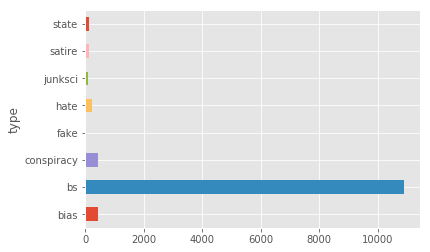

In [21]:
# all type of markings (bs, bias, fake etc...; bs means tweets with no label)
news.groupby(['type']).size().plot(kind='barh')
plt.show()

In [22]:
fake_news = news[news["type"] == "fake"]
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')
words = nltk.word_tokenize(" ".join(all_text.tolist()))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
fake_news.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
57,8a35883f9c9f0b15a9e20ab8711d403d91d57405,0,Jimmy Rustling,2016-10-27T13:00:00.000+03:00,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,english,2016-10-27T15:50:22.818+03:00,abcnews.com.co,CO,65078.0,The Amish In America Commit Their Vote To Dona...,0.000,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
58,c6fb8dae30e3d378935e910540a0cb99b5351ac0,0,Jimmy Rustling,2016-11-11T12:00:00.000+02:00,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,english,2016-11-11T16:33:32.484+02:00,abcnews.com.co,US,65078.0,Obama Signs Executive Order Declaring Investig...,0.009,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
379,504e8fa4469d75f8d22984220568e3313c74a1b7,0,"Day of the Dead 2015: History, food and reflec...",2016-10-27T05:18:00.000+03:00,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,"adobochron 10 Comments \nSan Francisco, Califo...",english,2016-10-27T07:25:28.782+03:00,adobochronicles.com,US,NaN,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
380,20e1a45f760f8db5f26207bbfe827bf8cd6d65bb,0,Ivan Jose,2016-10-27T09:18:46.193+03:00,Comment on Tutorial: Riding The Philippine Jee...,"adobochron 1 Comment \nMANILA, Philippines (Th...",english,2016-10-27T09:18:46.193+03:00,adobochronicles.com,US,NaN,Comment on Tutorial: Riding The Philippine Jee...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
381,9874fcff14d4af3c13954116c55590b28a5b98b8,0,Tony Rabon,2016-10-28T19:56:09.149+03:00,Comment on What White House Executive Chef Com...,"adobochron 1 Comment Comerford \nWASHINGTON, D...",english,2016-10-28T19:56:09.149+03:00,adobochronicles.com,US,NaN,Comment on What White House Executive Chef Com...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake


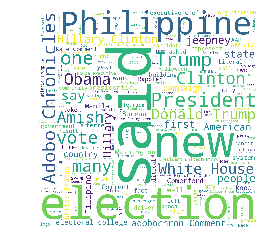

In [24]:
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1500
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [25]:
bigrams = nltk.bigrams(cleanwords)

counter = Counter(bigrams)
print(counter.most_common(10))

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


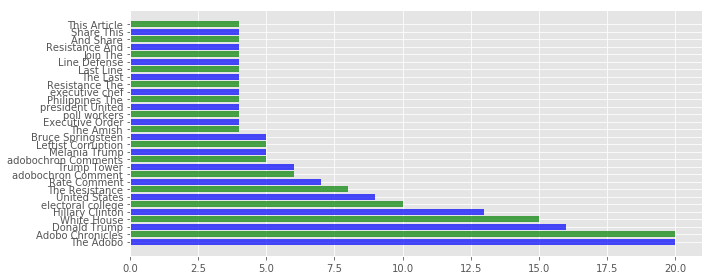

In [26]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
yvals = range(len(labels))
# Set the colors
colors = ['b', 'g']
ax.barh(yvals, values, align='center', color = colors, alpha=0.7)
plt.yticks(yvals,labels)
plt.tight_layout()

plt.show()

# Fake news vectorized classification

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools

In [28]:
y = news.type
news.drop("type", axis=1)

# fill nas
news.title.fillna("", inplace=True)
news.text.fillna("", inplace=True)

# training and test split
X_train, X_test, y_train, y_test = train_test_split(news['text'], y, test_size=0.33, random_state=53)

In [29]:
# build vectorized classifiers
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english', min_df=10)

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=10) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [30]:
print(tfidf_vectorizer.get_feature_names()[-30:])

print(count_vectorizer.get_feature_names()[:30])

['yugoslavia', 'yup', 'yuri', 'yves', 'zach', 'zakharova', 'zbigniew', 'zeal', 'zealand', 'zealots', 'zeitgeist', 'zero', 'zerohedge', 'zika', 'zimbabwe', 'zimmerman', 'zinc', 'zion', 'zionism', 'zionist', 'zionists', 'zip', 'zombie', 'zombies', 'zone', 'zones', 'zucker', 'zuckerberg', 'zuesse', 'état']
['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '101', '102', '103', '104', '105', '106', '107', '108', '10th', '11', '110', '1100', '111', '112', '113', '114']


In [31]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)
count_df.head()

set()


,00,000,01,02,03,04,05,06,07,08,...,zionists,zip,zombie,zombies,zone,zones,zucker,zuckerberg,zuesse,état
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
"""
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
"""
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [33]:
clf = MultinomialNB() 
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

# confusion matrix
# cm = metrics.confusion_matrix(y_test, pred, labels=['bs', 'bias', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state'])
# plot_confusion_matrix(cm, classes=['bs', 'bias', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state'])
# plt.show()

accuracy:   0.876


accuracy:   0.741
Confusion matrix, without normalization


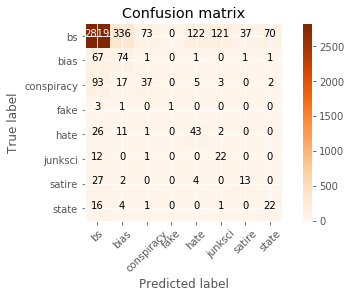

In [34]:
clf = MultinomialNB() 
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['bs', 'bias', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state'])
plot_confusion_matrix(cm, classes=['bs', 'bias', 'conspiracy', 'fake', 'hate', 'junksci', 'satire', 'state'])
plt.show()

## count vectorizer is outperforming tfidf because of no tuning